In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller

In [2]:
df=pd.read_csv( "/content/Time_series_analysis_and_forecast_DATASET.csv" )
df.head()


,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [3]:
df.describe()

,Tmax,SysLoad,GasPrice,ElecPrice
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [5]:
df[ "ds" ] = pd.to_datetime(df[ "FullDate" ])

In [6]:
df_copy = df.copy()

In [7]:
df_copy.set_index( "ds" , inplace= True )
df_daily = df_copy.resample('D').sum()
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3834 entries, 2010-09-01 to 2021-02-28
Freq: D
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tmax       3834 non-null   float64
 1   SysLoad    3834 non-null   float64
 2   GasPrice   3834 non-null   float64
 3   ElecPrice  3834 non-null   float64
dtypes: float64(4)
memory usage: 149.8 KB


In [8]:
df_daily.reset_index(inplace=True)
df_daily = df_daily.rename(columns={'index':'ds', 'ElecPrice':'y', 'SysLoad':'add1', 'Tmax':'add2', 'GasPrice':'add3'})
df_daily.head()

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [41]:
df_daily.reset_index(drop=True)

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.38000,88.5600,2751.700
1,2010-09-02,369.6,38898.99000,88.5600,570.810
2,2010-09-03,439.2,41665.76000,106.8000,504.975
3,2010-09-04,328.8,35638.08500,81.3600,502.275
4,2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...,...
3829,2021-02-24,537.6,-1525.49745,134.4000,634.770
3830,2021-02-25,518.4,4539.07855,130.5048,577.515
3831,2021-02-26,547.2,9517.02430,130.1808,1445.495
3832,2021-02-27,564.0,4932.88015,130.0800,488.980


In [42]:
df_train = df_daily[:2757]
df_test = df_daily[2557:]

In [10]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
from prophet import Prophet

In [12]:
model = Prophet()
model.fit(df_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpul4a1b0u/rfhfi792.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpul4a1b0u/sf8yjwim.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54842', 'data', 'file=/tmp/tmpul4a1b0u/rfhfi792.json', 'init=/tmp/tmpul4a1b0u/sf8yjwim.json', 'output', 'file=/tmp/tmpul4a1b0u/prophet_modelrb1j4dbm/prophet_model-20230131173053.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:30:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:30:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [13]:
future = model.make_future_dataframe(periods=len(df_test.drop(columns="y")) , freq= 'D' )
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-01,848.802868,-1466.624314,3465.173186,848.802868,848.802868,143.934254,143.934254,143.934254,159.353195,159.353195,159.353195,-15.418942,-15.418942,-15.418942,0.0,0.0,0.0,992.737122
1,2010-09-02,848.765391,-1218.628074,3454.452632,848.765391,848.765391,224.225577,224.225577,224.225577,257.107547,257.107547,257.107547,-32.881970,-32.881970,-32.881970,0.0,0.0,0.0,1072.990968
2,2010-09-03,848.727914,-1551.399271,3148.160450,848.727914,848.727914,-0.808614,-0.808614,-0.808614,50.273097,50.273097,50.273097,-51.081712,-51.081712,-51.081712,0.0,0.0,0.0,847.919300
3,2010-09-04,848.690437,-1606.909230,2795.755046,848.690437,848.690437,-341.125956,-341.125956,-341.125956,-271.443120,-271.443120,-271.443120,-69.682836,-69.682836,-69.682836,0.0,0.0,0.0,507.564481
4,2010-09-05,848.652960,-1887.433398,2680.583429,848.652960,848.652960,-431.103276,-431.103276,-431.103276,-342.724784,-342.724784,-342.724784,-88.378492,-88.378492,-88.378492,0.0,0.0,0.0,417.549684


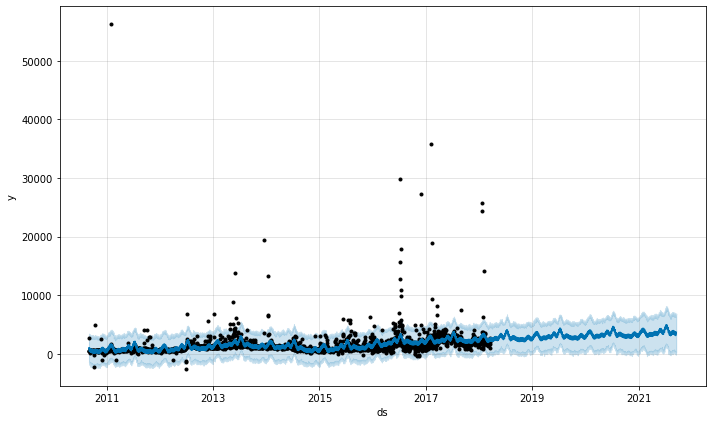

In [14]:
forecast[[ 'ds' , 'yhat' , 'yhat_lower' , 'yhat_upper' , 'trend' , 'trend_lower' , 'trend_upper' ]]
model.plot(forecast)
plt.show()

In [47]:
model = Prophet(interval_width=0.95)
model.add_regressor('add1')
model.add_regressor('add2')
model.add_regressor('add3')
model.fit(df_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpul4a1b0u/x8is_byq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpul4a1b0u/2qjjt4bh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30474', 'data', 'file=/tmp/tmpul4a1b0u/x8is_byq.json', 'init=/tmp/tmpul4a1b0u/2qjjt4bh.json', 'output', 'file=/tmp/tmpul4a1b0u/prophet_modelh7jc7niu/prophet_model-20230131180225.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:02:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:02:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [76]:
future = model.make_future_dataframe(periods=len(df_test.drop(columns="y")), freq='D')
future['add1'] = df_test['add1']
future['add2'] = df_test['add2']
future['add3'] = df_test['add3']
forecast = model.predict(future)

ValueError: ignored

In [57]:

df_test.add1 = pd.to_numeric(df_test.add1)
df_test.add2 = pd.to_numeric(df_test.add2)
df_test.add3 = pd.to_numeric(df_test.add3)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Text(0, 0.5, 'Electric Price')

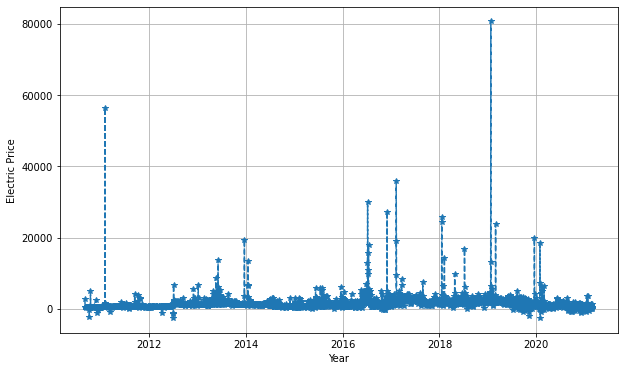

In [59]:
plt.figure(figsize=( 10 , 6 ))
plt.plot(df_daily.ds, df_daily.y, '--' , marker= '*' , )
plt.grid()
plt.xlabel( 'Year' )
plt.ylabel( 'Electric Price' )

In [64]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df_daily[ 'add1' ])
print(f'ADF Statistic: {adf_result[ 0 ]}')
print(f'p-value: {adf_result[ 1 ]}')
print('Critical Values:')
for k, v in adf_result[4].items():
  print(f'{k} : {v}')

ADF Statistic: -3.6901589888366457
p-value: 0.004253725504574117
Critical Values:
1% : -3.432070672988693
5% : -2.8623002987378547
10% : -2.567174716967499


In [65]:
adf_result = adfuller(df_daily[ 'add3' ])
print(f'ADF Statistic: {adf_result[ 0 ]}')
print(f'p-value: {adf_result[ 1 ]}')
print('Critical Values:')
for k, v in adf_result[4].items():
  print(f'{k} : {v}')

ADF Statistic: -2.90276669716518
p-value: 0.04502721288462542
Critical Values:
1% : -3.4320693157877544
5% : -2.8622996992165364
10% : -2.5671743978048323


In [66]:
adf_result = adfuller(df_daily[ 'y' ])
print(f'ADF Statistic: {adf_result[ 0 ]}')
print(f'p-value: {adf_result[ 1 ]}')
print('Critical Values:')
for k, v in adf_result[4].items():
  print(f'{k} : {v}')

ADF Statistic: -8.269053866873803
p-value: 4.848817773711633e-13
Critical Values:
1% : -3.432066157296446
5% : -2.8622983040036005
10% : -2.5671736550459663


In [71]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [72]:
MAPE(df_test.y, forecast.yhat)

464.7792800367722

In [73]:
rmse = np.sqrt(np.mean((df_test.y - forecast.yhat)**2))
rmse

3098.57828861235